# **Matplotlib Module**

## Introduction

[Matplotlib](https://matplotlib.org/users/index.html) is one of the most popular plotting libraries in Python. The [pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) sub-module is a high-level library of plotting commands very similar to Matlab syntax. Overt the years the community of Python users have developed a substantial amount of plots and an extensive documentation for Matplotlib. While more interactive libraries such as Bokeh and Plotly are strongly emerging in the plotting world, Matplotlib is still the most popular in the scientific enviroment and one of the easiest to get started.

It is common to tuse Matplotlib in combination with Numpy and Pandas modules. So, in this example we will use all three of them to generate some basic plots.

In [1]:
# Line required when plotting in Jupyter Lab
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load data

For this example we will use long-term data of atmospheric carbon dioxide concentration in Mauna Load, Hawaii. The monthly data timeseries spans from March, 1958 to November of 2018. Data is reported monthly.

Source: https://www.esrl.noaa.gov/gmd/ccgg/trends/full.html

In [2]:
# Define file path
dirname = '/Users/andrespatrignani/Dropbox/Teaching/Scientific programming/introcoding-spring-2019/Datasets/'
filename = 'mauna_loa_co2.csv'

# Load data
df = pd.read_csv(dirname + filename)

# Print top entries in DataFrame
df.head(5)

,year,month,co2_ppm
0,1958,3,315.71
1,1958,4,317.45
2,1958,5,317.50
3,1958,6,317.10
4,1958,7,315.86


In [3]:
# Calculate a decimal year so that we can plot the monthly data
df['decimal_date'] = df.year + df.month/12

# Check that our computation
df.head(5)

,year,month,co2_ppm,decimal_date
0,1958,3,315.71,1958.250000
1,1958,4,317.45,1958.333333
2,1958,5,317.50,1958.416667
3,1958,6,317.10,1958.500000
4,1958,7,315.86,1958.583333


<a name="matplotlib_parameters"></a>
## Parameters

Before we create a plot I want to show how to access all the parameters in a plot, so that can search and learn about all the possibilities.

In [ ]:
print(plt.rcParams.items)

Sometimes after changing many parameters we may want to go back to the defaults. When working in the Jupyter Lab and Jupyter Notebook we need to be aware that most times we use the `inline` backend, which ensures that Matplotlig figures render in Jupyter Lab and Jupyter Notebooks. The `inline` has its own default parameters, so in order to reset figure preoperties we need to run the following sequence of commands:

```python

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

inline_rc = dict(mpl.rcParams)
mpl.rcParams.update(inline_rc)
```

>If the following sets of commands don't work, then you can always restart the Python kernel and load the module again. Unless you have lots of as a result of lengthy computations sometimes the oldest trick in the book is the fastest option.

<a name="matplotlib_line"></a>
## Line plot

A more generic method of creating line and scatter plots. You can use Matlab-like syntax.

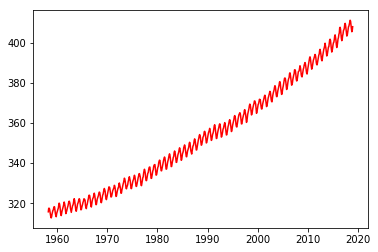

In [4]:
# Barebones of line plot
plt.plot(df.decimal_date, df.co2_ppm, '-r')
plt.show()

This is the simplest line plot we can generate. It's still missing axis labels and probably we need to plot a shorter period since we can hardly see any data. In the following steps we will write few more commands to improve the figure, but before that let's inspect the components of the first line:

`plt.plot()`: Most basic plotting function. It generates a line plot

`decimal_date`: This the `x` data

`df.co2_ppm`: This is the `y` data

`'-r'`: The `-` indicates a solid line and `r` indicates that the color is red.

Other possible colors are: 

`k`: black,
`b`: blue,
`g`: green,
`y`: yellow

Other possible line styles are:
`--`: Dashed line,
`-.`: Dashed dot line,
`:`:  Dotted line

Now it's time to tweak few more parameters in addition to line style and line color to improve our figure. From now on I will only plot the first 50 values of the dataset, so that we can better see the details of the timeseries.

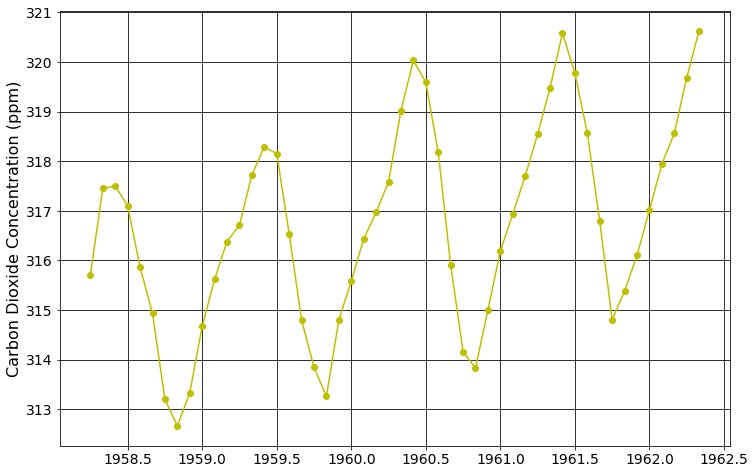

In [6]:
# Line plot
plt.figure(figsize=(12,8)) # sets figure size in inches
plt.plot(df.decimal_date[0:50], df.co2_ppm[0:50],'-oy')
plt.ylabel('Carbon Dioxide Concentration (ppm)', fontsize=16)

# Parameters
plt.rcParams['axes.grid'] = True;
plt.rcParams['grid.color'] = 'k'
plt.rcParams['ytick.labelsize'] = 14.0
plt.rcParams['xtick.labelsize'] = 14.0
plt.show()


<a name="matplotlib_scatter"></a>
## Scatter plot


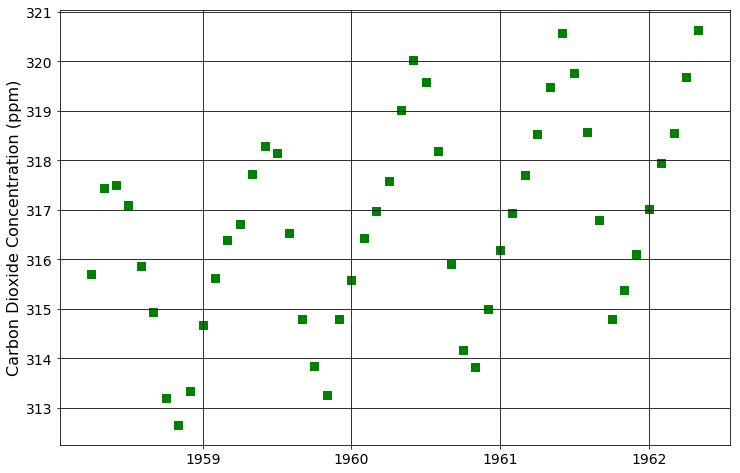

In [10]:
# Scatter plot
plt.figure(figsize=(12,8)) 
plt.scatter(df.decimal_date[0:50], 
            df.co2_ppm[0:50], 
            s=55, 
            marker='s', 
            facecolors='g', 
            edgecolors='g')
plt.ylabel('Carbon Dioxide Concentration (ppm)', fontsize=16)
plt.show()


<a name="matplotlib_line_scatter"></a>
## Combined scatter and line plot

In Matplotlib you can easily overlay different plots. In this case we will overlay a line and scatter plots containing the same data, but the same applies if the dataset in the line plot is different than that of the scatter plot. The only detail to remember if we want the plots to overlap is that data must have a similar range.

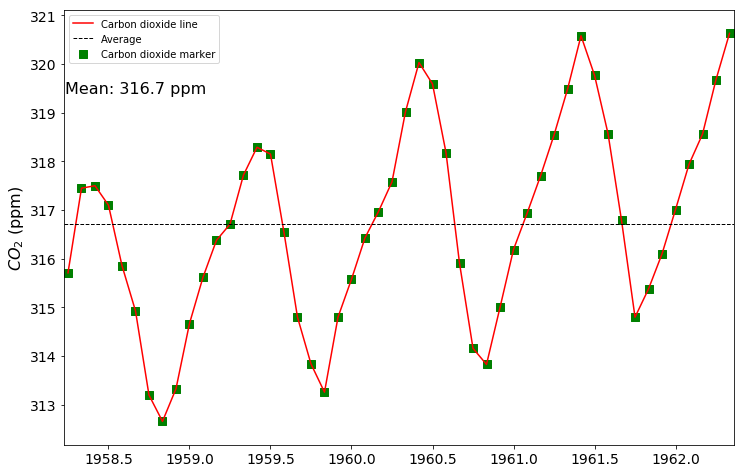

In [23]:
# Line and scatter plot

# Figure size
plt.figure(figsize=(12,8))

# Add line plot
plt.plot(df.decimal_date[0:50], 
         df.co2_ppm[0:50], 
         '-r')

# Add scatter plot
plt.scatter(df.decimal_date[0:50], 
            df.co2_ppm[0:50], 
            s=55, 
            marker='s', 
            facecolors='g', 
            edgecolors='g')

# Calculate average of first 50 values
avg_co2 = df.co2_ppm[0:50].mean()

# Add horizontal line representing mean value
plt.axhline(y=avg_co2, 
            linewidth=1, 
            color='k', 
            linestyle='--')
#plt.plot(df.decimal_date[0:50],np.ones(df.co2_ppm[0:50].size)*avg_co2 ,'--k')

# Add ylabel
plt.ylabel('$CO_2$ (ppm)', fontsize=16)

# Add legend
plt.legend(['Carbon dioxide line','Average','Carbon dioxide marker'])

# Add annotation
annotation_label = 'Mean: ' + str(round(df.co2_ppm[0:50].mean(),1)) + ' ppm'
plt.annotate(annotation_label, xy=(65, 380), xycoords='figure points', fontsize=16)

# Remove extra marging
plt.autoscale(enable=True, axis='x', tight=True)

plt.rcParams['axes.grid'] = False;
plt.rcParams['ytick.labelsize'] = 14.0
plt.rcParams['xtick.labelsize'] = 14.0
plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['axes.spines.top'] = True
plt.show()

<a name="matplotlib_subplots"></a>
## Subplots

A way of condensing figures using different subplot layouts

In [29]:
# Set file path
dirname = '/Users/andrespatrignani/Dropbox/Teaching/Scientific programming/introcoding-spring-2019/Datasets/'
filename = 'global_wheat.csv'


In [30]:
# Load wheat data
df = pd.read_csv(dirname + filename)
df.head(5)

,year,Argentina_area_has,Argentina_production_ton,Argentina_yield_hg_ha,Australia_area_has,Australia_production_ton,Australia_yield_hg_ha,Canada_area_has,Canada_production_ton,Canada_yield_hg_ha,...,Germany_yield_hg_ha,Mexico_area_has,Mexico_production_ton,Mexico_yield_hg_ha,UK_area_has,UK_production_ton,UK_yield_hg_ha,US_area_has,US_production_ton,US_yield_hg_ha
0,1961,4420900,5725000,12950,5958110,6727190,11291,10245000,7713000,7529,...,28607,836538,1401910,16758,739000,2614000,35372,20870000,33539000,16070
1,1962,3744700,5700000,15222,6664680,8352910,12533,10853000,15393000,14183,...,33898,747728,1455260,19462,913000,3974000,43527,17680000,29718000,16809
2,1963,5676000,8940000,15751,6666680,8924460,13387,11156000,19691000,17651,...,33934,819210,1702990,20788,780000,3046000,39051,18415000,31211900,16949
3,1964,6135400,11260000,18353,7251500,10037000,13841,12018000,16349000,13604,...,34845,818325,2203070,26922,893000,3793000,42475,20138000,34928000,17344
4,1965,4601200,6079000,13212,7087980,7067060,9970,11453000,17674000,15432,...,32321,858259,2150350,25055,1026000,4171000,40653,20056000,35805000,17853


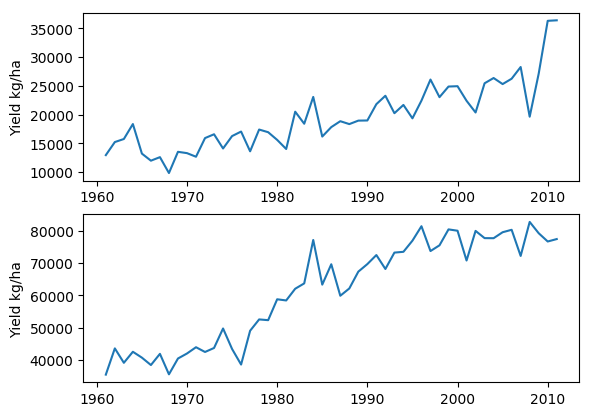

In [40]:
# Subplots

plt.figure()

plt.subplot(2,1,1)
plt.plot(df.year,df.Argentina_yield_hg_ha)
plt.ylabel('Yield kg/ha')

plt.subplot(2,1,2)
plt.plot(df.year,df.UK_yield_hg_ha)
plt.ylabel('Yield kg/ha')

plt.show()
# The subplot() command specifies numrows, numcols, plot_number

<a name="matplotlib_secondary_yaxis"></a>
## Secondary Y axis plots

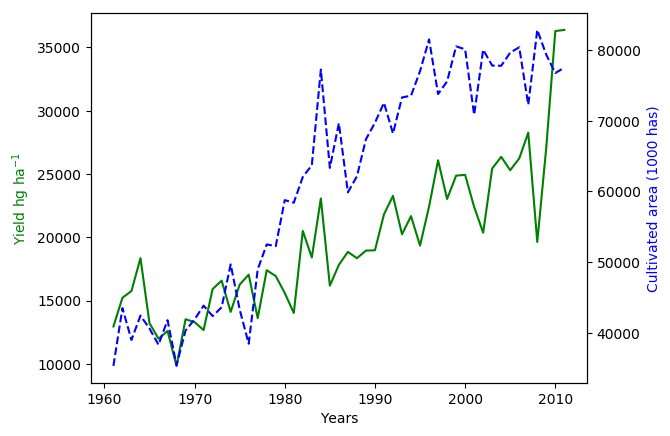

In [36]:
# Creating plot with secondary Y axis

plt.figure()

ax1 = plt.subplot()
ax1.plot(df.year,df.Argentina_yield_hg_ha,'-g')

ax2 = ax1.twinx()
ax2.plot(df.year,df.UK_yield_hg_ha,'--b')

ax1.set_xlabel('Years')
ax1.set_ylabel('Yield hg $\mathregular{ha^{-1}}$', color='g')
ax2.set_ylabel('Cultivated area (1000 has)', color='b')

plt.show()

<a name="matplotlib_styles"></a>
## Styles

In addition to the default style, Matplotlib has a variery of pre-defined styles. TO see some examples visit the following websites:

Gallery 1 at: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

Gallery 2 at: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

To see the available styles just type:

In [ ]:
print(plt.style.available)

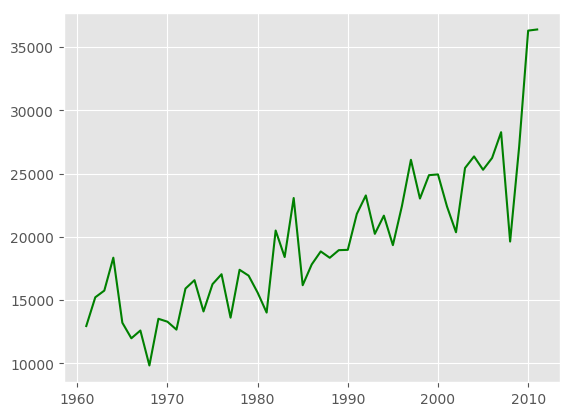

In [37]:
# Change plot defaults to ggplot style (similar to ggplot R language library)

plt.style.use('ggplot') # Use plt.style.use('default') to revert.
plt.plot(df.year,df.Argentina_yield_hg_ha,'-g')
plt.show()

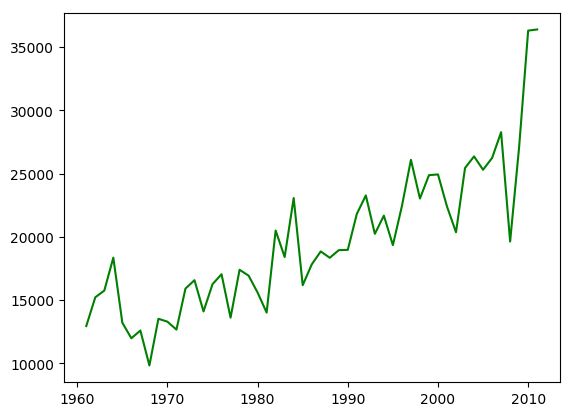

In [39]:
# Plot using the default style

plt.style.use('default') # Use plt.style.use('default') to revert.
plt.plot(df.year,df.Argentina_yield_hg_ha,'-g')
plt.show()

<a name="matplotlib_savefig"></a>
## Saving a figure

savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
        
Source: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html

In [ ]:
# Example plot
plt.plot(df.year,df.Argentina_yield_hg_ha,'-g')

# Save command specifying the number of dots per inch
plt.savefig('examplefig.png', dpi=200) 